Epoch: 0/101		Training cost = 1.52e+01		Validation cost = 1.51e+01
Epoch: 10/101		Training cost = 2.51e+00		Validation cost = 2.15e+00
Epoch: 20/101		Training cost = 1.04e+00		Validation cost = 8.42e-01
Epoch: 30/101		Training cost = 8.76e-01		Validation cost = 7.52e-01
Epoch: 40/101		Training cost = 8.57e-01		Validation cost = 7.62e-01
Epoch: 50/101		Training cost = 8.55e-01		Validation cost = 7.70e-01
Epoch: 60/101		Training cost = 8.54e-01		Validation cost = 7.74e-01
Epoch: 70/101		Training cost = 8.54e-01		Validation cost = 7.75e-01
Epoch: 80/101		Training cost = 8.54e-01		Validation cost = 7.75e-01
Epoch: 90/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 100/101		Training cost = 8.54e-01		Validation cost = 7.76e-01


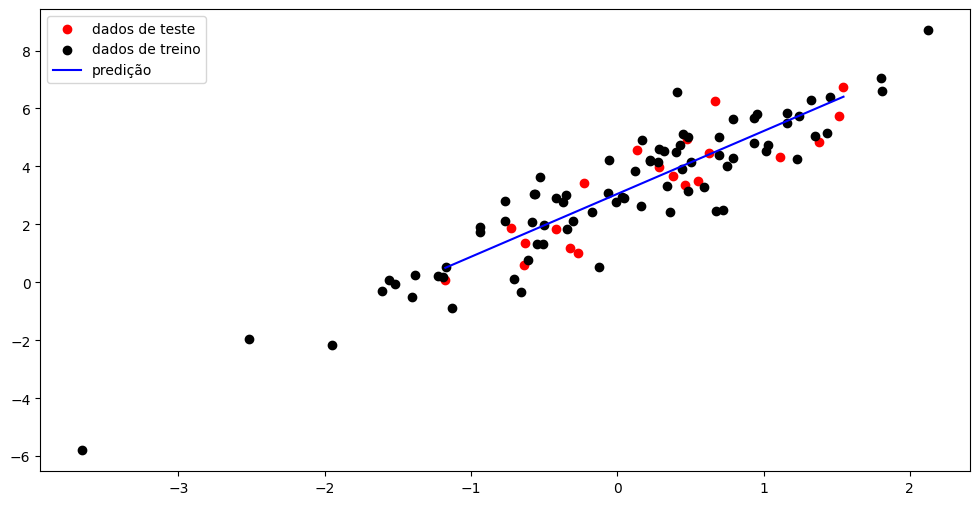

Viés aprendido (b): 3.0512817185027297
Peso aprendido (w): 2.1695230642637213

Comparação com pesos das equações normais (viés e peso):
 [3.05134874 2.16954833]

Exemplo didático:
X:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]]
y:
 [[3]
 [5]
 [7]
 [9]]
X.T * X:
 [[ 4.  6.]
 [ 6. 14.]]
X.T * y:
 [[24.]
 [46.]]
Solução ótima:
 [[3.]
 [2.]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Geração de dados de treino e teste com ruído (80/20 split)
np.random.seed(7654)  # Semente aleatória fixa para reprodutibilidade
xTrain = np.random.randn(80)  # 80 pontos de treino (distribuição normal)
yTrain = 2 * xTrain + 3 + np.random.randn(80)  # Relação linear com ruído

xTest = np.random.randn(20)  # 20 pontos de teste
yTest = 2 * xTest + 3 + np.random.randn(20)  # Mesma relação com ruído

# Implementação da regressão linear do zero
class LinearRegression:
    def __init__(self):
        self.weight = 0  # Inicializa peso (coeficiente angular)
        self.bias = 0    # Inicializa viés (coeficiente linear)

    def forward(self, x):
        y = self.weight * x + self.bias  # Predição do modelo (y = wx + b)
        return y

    def costFunction(self, x, y):
        cost = np.mean((self.forward(x) - y) ** 2)  # Cálculo do MSE (erro quadrático médio)
        return cost

    def gradient(self, x, y):
        # Cálculo dos gradientes para descida do gradiente
        gradientWeight = np.mean(2 * (self.forward(x) - y) * x)  # Gradiente do peso
        gradientBias = np.mean(2 * (self.forward(x) - y))        # Gradiente do viés
        return gradientWeight, gradientBias

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
        # Loop de treinamento
        for epoch in range(epochs):
            costTrain = self.costFunction(xTrain, yTrain)  # Custo no treino
            costTest = self.costFunction(xTest, yTest)     # Custo no teste

            # Atualização dos parâmetros via descida do gradiente
            gradientWeight, gradientBias = self.gradient(xTrain, yTrain)
            self.weight -= lr * gradientWeight
            self.bias -= lr * gradientBias

            if epoch % 10 == 0:  # Log a cada 10 épocas
                print(f"Epoch: {epoch}/{epochs}\t\tTraining cost = {costTrain:.2e}\t\tValidation cost = {costTest:.2e}")

# Treinamento do modelo
lr = 5e-2  # Taxa de aprendizado
epochs = 101  # Número de épocas

model = LinearRegression()
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)

# Visualização dos resultados
yPred = model.forward(np.linspace(np.min(xTest), np.max(xTest), 100))  # Predição para plotagem

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(xTest, yTest, color="r", label="dados de teste")
ax.scatter(xTrain, yTrain, color="k", label="dados de treino")
ax.plot(np.linspace(np.min(xTest), np.max(xTest), 100), yPred, "b", label="predição")
ax.legend()
plt.show()

# Comparação com solução analítica (equações normais)
print('Viés aprendido (b):', model.bias)
print('Peso aprendido (w):', model.weight)

# Solução via equações normais (X^T X)^-1 X^T y
X = np.hstack([np.ones((xTrain.shape[0], 1)), xTrain.reshape(-1, 1)])  # Matriz de design com coluna de 1s
theta = np.linalg.inv(X.T @ X) @ X.T @ yTrain  # Solução ótima

print("\nComparação com pesos das equações normais (viés e peso):\n", theta)

# Demonstração das equações normais em um exemplo simples
x_example = np.matrix(range(4)).T
y_example = 2 * x_example + 3
X_example = np.hstack([np.ones((x_example.shape[0], 1)), x_example])

print('\nExemplo didático:')
print('X:\n', X_example)
print('y:\n', y_example)
print('X.T * X:\n', X_example.T @ X_example)
print('X.T * y:\n', X_example.T @ y_example)
print('Solução ótima:\n', np.linalg.inv(X_example.T @ X_example) @ X_example.T @ y_example)